In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

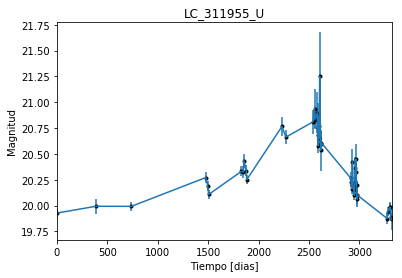

In [2]:
data = np.genfromtxt('LC_311955_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311955_U')
plt.savefig("LC_311955_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

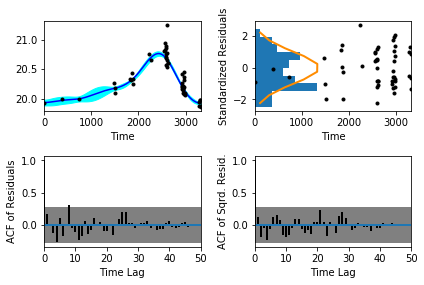

In [5]:
sample.assess_fit()

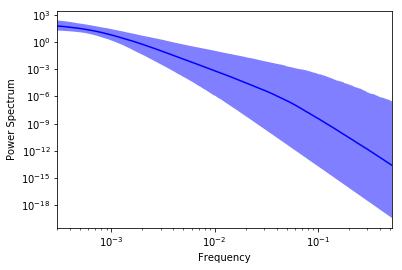

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

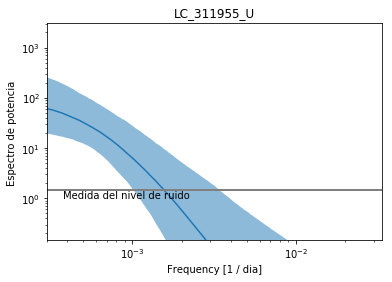

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311955_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311955_U')

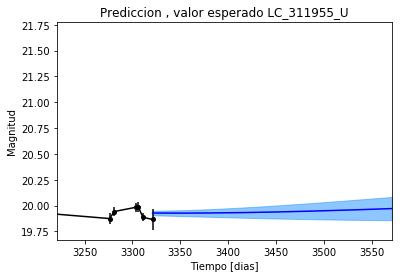

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311955_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311955_U')

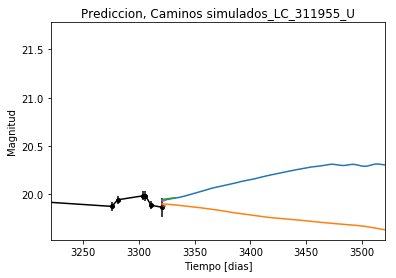

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311955_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


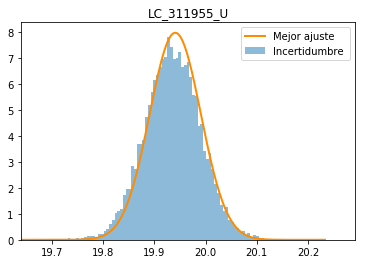

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311955_U')
plt.savefig("Mejor_ajuste_LC_311955_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311955_U')

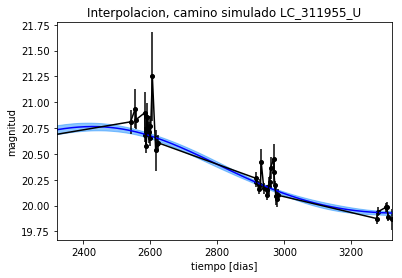

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_U')

Text(0.5,1,'Interpolacion, camino simulado LC_311955_U')

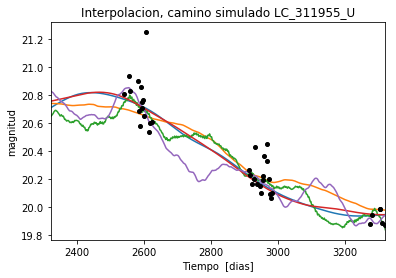

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_U')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 457.011614135
Median: 0.00895950983602
Standard deviation: 0.208744703418
68% credibility interval: [ 0.00055094  0.21396033]
95% credibility interval: [  3.26254223e-04   8.22638616e-01]
99% credibility interval: [  3.06710037e-04   1.00541515e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 478.615565897
Median: 0.000698683570342
Standard deviation: 0.0622165115728
68% credibility interval: [ 0.00036256  0.01355053]
95% credibility interval: [ 0.00031002  0.1941404 ]
99% credibility interval: [  3.03140249e-04   4.49250827e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 614.841810792
Median: 0.0112053677388
Standar

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1105.84890204
Median: 57.0229220095
Standard deviation: 1.63631340174
68% credibility interval: [ 55.20566313  58.27967786]
95% credibility interval: [ 52.76317029  58.89728646]
99% credibility interval: [ 50.85441194  59.21508751]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 373.150443149
Median: 0.585899221309
Standard deviation: 2.05296091689
68% credibility interval: [ 0.04576344  3.5390158 ]
95% credibility interval: [ 0.01082064  6.7194202 ]
99% credibility interval: [  8.76247914e-03   9.30560171e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1316.2442411
Median: 0.106267496123
Standard deviation: 7.07033510272
68% credibility interval: [ 0.00527604  4.39290796]
95% credibility interval: [  3.32

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10102.4854522
Median: 1.05557106032e-34
Standard deviation: 7.11768866339e+75
68% credibility interval: [  5.21016154e-64   1.15943180e-09]
95% credibility interval: [  9.81318722e-99   1.30492511e+01]
99% credibility interval: [  7.88595948e-141   1.05386303e+002]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1421.83876825
Median: 20.1617655797
Standard deviation: 0.184700011992
68% credibility interval: [ 19.99551577  20.31530087]
95% credibility interval: [ 19.76851863  20.52175276]
99% credibility interval: [ 19.57591345  20.69264674]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 553.616141665
Median: 0.000250289689688
Standard deviation: 0.207377892592
68% credibility interval: [ 0.          0.17672414]
95% credibility interval: [ 0.          0.78994167]
99% credibility interval: [ 0.          0.96708023]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 553.616141665
Median: 0.000250289689688
Standard deviation: 0.207377892592
68% credibility interval: [ 0.          0.17672414]
95% credibility interval: [ 0.          0.78994167]
99% credibility interval: [ 0.          0.96708023]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 480.722280288
Median: 0.0
Standard deviation: 0.00018534270715
68%

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1105.84890204
Median: 57.0229220095
Standard deviation: 1.63631340174
68% credibility interval: [ 55.20566313  58.27967786]
95% credibility interval: [ 52.76317029  58.89728646]
99% credibility interval: [ 50.85441194  59.21508751]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1425.34506095
Median: 0.0971406314701
Standard deviation: 0.102652280144
68% credibility interval: [ 0.05708981  0.18323196]
95% credibility interval: [ 0.0353613   0.39397979]
99% credibility interval: [ 0.02770478  0.6187886 ]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1589.50137484
Median: 1.13013650642
Standard deviation: 0.176662005896
68% credibility interval: [ 0.97115507  1.32221879]
95% credibility interval: [ 0.83788663  1.52546784]
99% credibility interval: [ 0.75995806  1.68580375]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1291.35711179
Median: 1.74110607457e-05
Standard deviation: 0.108552336701
68% credibility interval: [  4.52161714e-07   1.07498940e-03]
95% credibility interval: [  1.94702116e-08   2.83794171e-02]
99% credibility interval: [  4.25661711e-09   4.63972759e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 457.011614135
Median: (-0.0562942605612+0j)
Standard deviation: 1.84879395507
68% credibility interval: [-1.34435242+0.j         -0.00346164-2.25268711j]
95% credibility interval: [ -5.16879087e+00+0.j          -2.04991574e-03-0.11480247j]
99% credibility interval: [ -6.31720970e+00+0.j          -1.92711600e-03-0.00404454j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 478.615565897
Median: (-0.00438995834354+0j)
Standard deviation: 1.36037106584
68% credibility interval: [-0.08514047+0.74077874j -0.00227800+0.j        ]
95% credibility interval: [-1.21982011+2.10134695j -0.00194792+0.00465267j]
99% credibility interval: [ -2.82272619e+00+1.1289218j  -1.90468636e-03+0.j       ]
Posterior summary for parameter ar_root